In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import numpy as np

from PIL import Image, ImageOps
import os

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, Reshape, GlobalAveragePooling1D

from collections import defaultdict

In [ ]:
!pip install hmmlearn
from hmmlearn import hmm

In [ ]:
mfrom google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load data
p00_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p00_n1_NEW_X.npy')
p00_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p00_n1_NEW_y.npy')
p01_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p01_n1_NEW_X.npy')
p01_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p01_n1_NEW_y.npy')
# p02_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p02_n1_NEW_X.npy')
# p02_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p02_n1_y.npy')
# p03_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p03_n1_X.npy')
# p03_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p03_n1_y.npy')
# p04_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p04_n1_X.npy')
# p04_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p04_n1_y.npy')
# p05_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p05_n1_X.npy')
# p05_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p05_n1_y.npy')
# p06_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p06_n1_X.npy')
# p06_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p06_n1_y.npy')
# p07_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p07_n1_X.npy')
# p07_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p07_n1_y.npy')

datasets = [(p00_n1_X, p00_n1_y)]

# datasets = [(p00_n1_X, p00_n1_y), (p01_n1_X, p01_n1_y), (p02_n1_X, p02_n1_y),(p03_n1_X, p03_n1_y),(p04_n1_X, p04_n1_y),(p05_n1_X, p05_n1_y),(p06_n1_X, p06_n1_y), (p07_n1_X, p07_n1_y)]

In [ ]:
def preprocess_data(X):
    # Flatten or extract features from X
    # Example: Flattening (which might not be the best approach)
    # This needs to be replaced with a more sophisticated feature extraction method
    N, channels, samples_per_epoch = X.shape
    X_processed = X.reshape(N, -1)
    return X_processed


# Initialize HMM parameters
n_states = 7  # Assuming 7 sleep stages
model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=10)

# Initialize transition matrix with a small constant
epsilon = 1e-4  # Small constant value
uniform_transmat = np.full((n_states, n_states), epsilon)
model.transmat_ = uniform_transmat / uniform_transmat.sum(axis=1, keepdims=True)

# Check and Set startprob_
if not np.isclose(model.startprob_.sum(), 1):
    model.startprob_ = np.full(n_states, 1.0 / n_states)

# Check if startprob_ contains NaN values
if np.isnan(model.startprob_).any():
    model.startprob_ = np.full(n_states, 1.0 / n_states)

model.transmat_ = np.full((n_states, n_states), 1.0 / n_states)
# Modify init_params to prevent overwriting startprob_ and transmat_
model.init_params = model.init_params.replace('s', '').replace('t', '')

# Iterate over each dataset
for X, y in datasets:

    X_processed = preprocess_data(X)
    # Train the HMM
    # Note: If the sequences within a dataset are independent, you might need to adjust 'lengths'
    model.fit(X_processed)


AttributeError: 'GaussianHMM' object has no attribute 'startprob_'

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

X_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p09_n1_NEW_X.npy')
y_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p09_n1_NEW_y.npy')

# Assuming your model is named 'model' and the preprocess_data function is defined
# Preprocess the test data
X_test_processed = preprocess_data(X_test)

# Predict sleep stages with the HMM model
predicted_stages = model.predict(X_test_processed)

# Evaluate the model
# Note: Make sure y_test is in the correct format for comparison
accuracy = accuracy_score(y_test, predicted_stages)
conf_matrix = confusion_matrix(y_test, predicted_stages)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


ValueError: startprob_ must sum to 1 (got nan)

In [ ]:
model = hmm.GaussianHMM(n_components=7, covariance_type="diag", n_iter=100)

In [ ]:
N, T, F = X_downsampled.shape
X_downsampled_reshaped = X_downsampled.reshape(N, T * F)

# Now you can fit the model
model.fit(X_downsampled_reshaped)

/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:340: RuntimeWarning: invalid value encountered in divide
  self.means_ = ((means_weight * means_prior + stats['obs'])


GaussianHMM(n_components=7, n_iter=100)

In [ ]:
X_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p09_n1_NEW_X.npy')
y_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p09_n1_NEW_y.npy')

# Check and handle NaNs in your data
if np.isnan(X_test_reshaped).any():
    # Handle NaNs, e.g., replace with zeros or mean values
    X_test_reshaped = np.nan_to_num(X_test_reshaped)

N, C, T = X_test.shape
X_test_reshaped = X_test[:, 3:6, :].reshape(N, -1)

test_score = model.score(X_test_reshaped)
print(f"Test Score (Log Likelihood): {test_score}")

y_pred = model.predict(X_test_reshaped)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ValueError: startprob_ must sum to 1 (got nan)

In [ ]:
X_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p09_n1_NEW_X.npy')
y_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p09_n1_NEW_y.npy')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test[:, 3:6, :], y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict the labels for the test set
y_pred = model.predict(X_test[:, 3:6, :])
y_pred_classes = np.argmax(y_pred, axis=1)  # Corrected line

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred_classes))

86/86 [==============================] - 1s 7ms/step - loss: 105.7134 - accuracy: 0.6266
Test Loss: 105.71341705322266
Test Accuracy: 0.6266471743583679
86/86 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

         1.0       0.65      0.95      0.77      1739
         2.0       0.00      0.00      0.00        19
         3.0       0.44      0.09      0.15       567
         4.0       0.05      0.01      0.02        89
         5.0       0.00      0.00      0.00        83
         6.0       0.04      0.00      0.01       235

    accuracy                           0.63      2732
   macro avg       0.20      0.18      0.16      2732
weighted avg       0.51      0.63      0.52      2732

[[1659    4   54    9    2   11]
 [  18    0    0    1    0    0]
 [ 487    9   51    7    0   13]
 [  77    0   10    1    0    1]
 [  81    0    0    2    0    0]
 [ 233    0    1    0    0    1]]


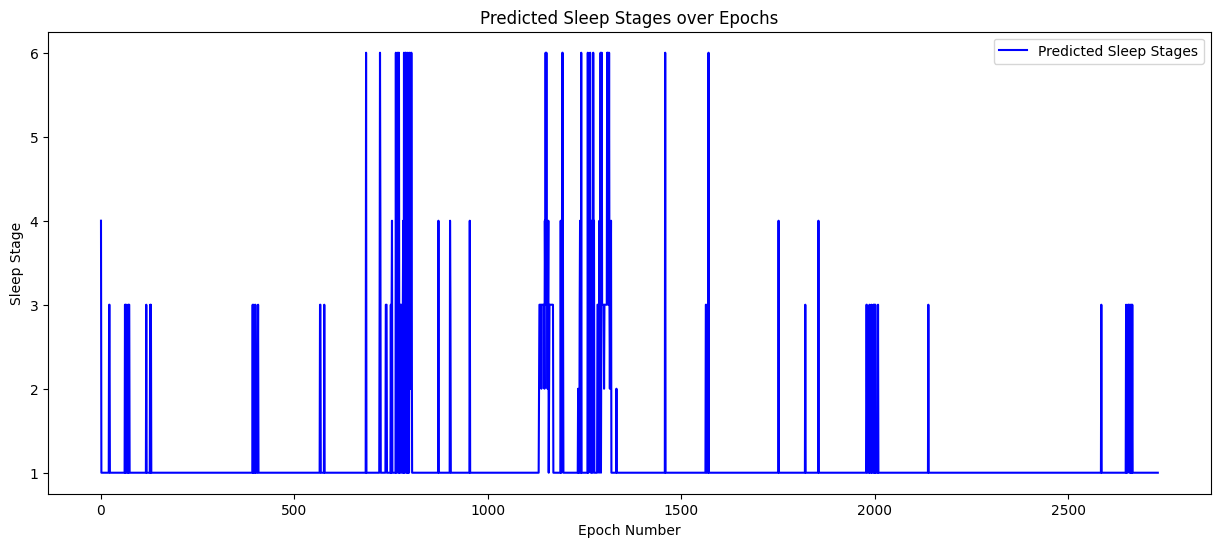

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred_classes is your array of predicted sleep stages
# And let's say you have an array of epoch numbers corresponding to these predictions
epochs = range(len(y_pred_classes))

# Create a line plot
plt.figure(figsize=(15, 6))  # Set the figure size
plt.plot(epochs, y_pred_classes, label='Predicted Sleep Stages', color='b')
plt.xlabel('Epoch Number')
plt.ylabel('Sleep Stage')
plt.title('Predicted Sleep Stages over Epochs')
plt.legend()
plt.show()

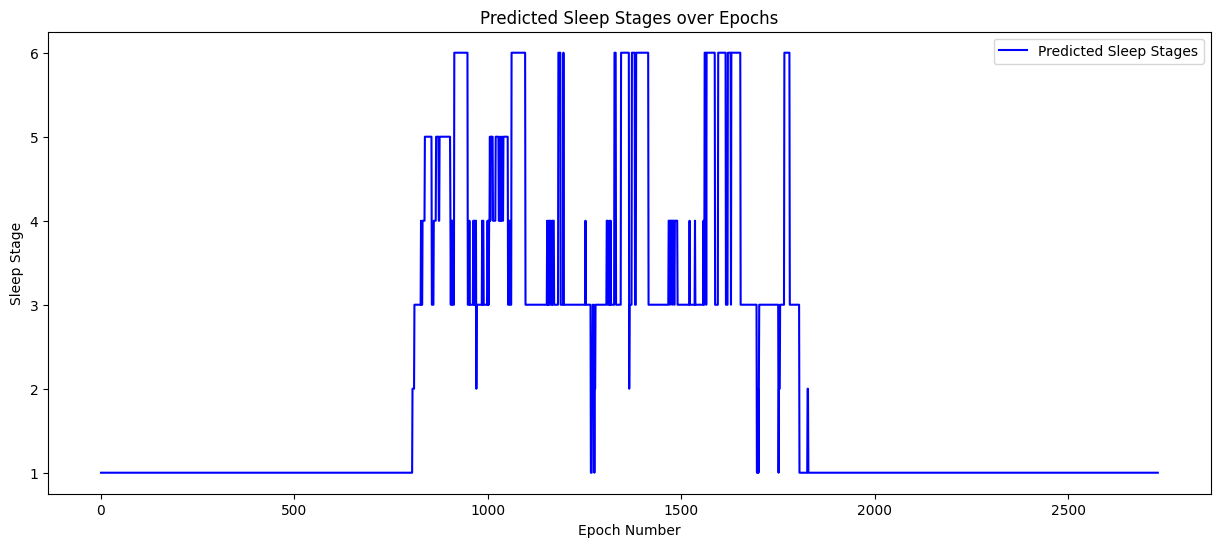

In [ ]:
# Create a line plot
plt.figure(figsize=(15, 6))  # Set the figure size
plt.plot(epochs, y_test, label='Predicted Sleep Stages', color='b')
plt.xlabel('Epoch Number')
plt.ylabel('Sleep Stage')
plt.title('Predicted Sleep Stages over Epochs')
plt.legend()
plt.show()

In [ ]:
# Load data
p00_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n1_X.npy')
p00_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n1_y.npy')
p01_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p01_n1_X.npy')
p01_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p01_n1_y.npy')

datasets = [(p00_n1_X, p00_n1_y), (p01_n1_X, p01_n1_y)]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
for i, (X, y) in enumerate(datasets):
    print(f"Training on dataset {i+1}...")
    # Flatten the X array to 2D for Random Forest
    X_flattened = X.reshape(X.shape[0], -1)

    # Initialize the Random Forest Classifier
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier
    rf_clf.fit(X_flattened, y)

    # Predict on the same dataset (usually you would have a separate test set)
    y_pred = rf_clf.predict(X_flattened)

    # Print accuracy and classification report
    accuracy = accuracy_score(y, y_pred)
    print(f'Accuracy on dataset {accuracy}')
    print(classification_report(y, y_pred))


Training on dataset 1...
Accuracy on dataset 1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1997
         2.0       1.00      1.00      1.00        58
         3.0       1.00      1.00      1.00       250
         4.0       1.00      1.00      1.00       101
         5.0       1.00      1.00      1.00       119
         6.0       1.00      1.00      1.00       125

    accuracy                           1.00      2650
   macro avg       1.00      1.00      1.00      2650
weighted avg       1.00      1.00      1.00      2650

Training on dataset 2...
Accuracy on dataset 1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1856
         2.0       1.00      1.00      1.00       109
         3.0       1.00      1.00      1.00       562
         4.0       1.00      1.00      1.00        96
         5.0       1.00      1.00      1.00         9
         6.0       1.00      1.00 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n2_X.npy')
y_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n2_y.npy')

# Preprocess test data (the same way you preprocessed training data)
# If your test data is 3D (N x Channels x Time), you need to flatten it to 2D (N x Features)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Predict using the trained model
y_pred = rf_clf.predict(X_test_flattened)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7088339222614841
              precision    recall  f1-score   support

         1.0       0.86      0.95      0.90      1885
         2.0       0.00      0.00      0.00        59
         3.0       0.28      0.37      0.32       373
         4.0       0.00      0.00      0.00        94
         5.0       0.00      0.00      0.00       204
         6.0       0.32      0.39      0.35       215

    accuracy                           0.71      2830
   macro avg       0.24      0.28      0.26      2830
weighted avg       0.63      0.71      0.67      2830

[[1785    0   89    0    0   11]
 [  13    0   27    0    0   19]
 [ 115    0  137    0    0  121]
 [  42    0   40    0    0   12]
 [  64    0  128    0    0   12]
 [  59    0   72    0    0   84]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


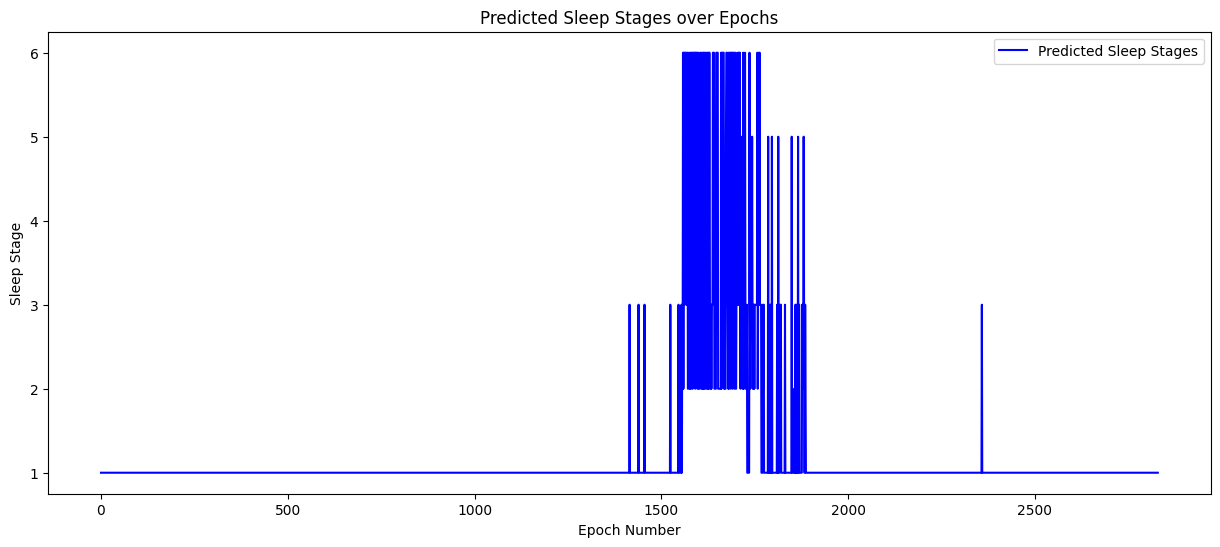

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred_classes is your array of predicted sleep stages
# And let's say you have an array of epoch numbers corresponding to these predictions
epochs = range(len(y_pred_classes))

# Create a line plot
plt.figure(figsize=(15, 6))  # Set the figure size
plt.plot(epochs, y_pred_classes, label='Predicted Sleep Stages', color='b')
plt.xlabel('Epoch Number')
plt.ylabel('Sleep Stage')
plt.title('Predicted Sleep Stages over Epochs')
plt.legend()
plt.show()

In [ ]:
data_sets = [(p00_n1_X, p00_n1_y), (p00_n2_X, p00_n2_y)]

model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(GlobalAveragePooling1D())  # This layer will help in reducing the output to a one-dimensional array
model.add(Dense(100, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Output layer for 7 classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

for X, y in data_sets:
    # Normalize X
    X = X / np.max(X)

    # Train the model on each set
    model.fit(X, y, epochs=30, batch_size=32)


Epoch 1/30
83/83 [==============================] - 2s 14ms/step - loss: 1.2969 - accuracy: 0.7404
Epoch 2/30
83/83 [==============================] - 1s 14ms/step - loss: 0.8307 - accuracy: 0.7766
Epoch 3/30
83/83 [==============================] - 2s 21ms/step - loss: 0.7636 - accuracy: 0.7823
Epoch 4/30
83/83 [==============================] - 2s 20ms/step - loss: 0.7281 - accuracy: 0.7857
Epoch 5/30
83/83 [==============================] - 2s 21ms/step - loss: 0.7055 - accuracy: 0.7913
Epoch 6/30
83/83 [==============================] - 1s 18ms/step - loss: 0.7071 - accuracy: 0.7925
Epoch 7/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6943 - accuracy: 0.7977
Epoch 8/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6812 - accuracy: 0.8000
Epoch 9/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6816 - accuracy: 0.7989
Epoch 10/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6815 - accuracy: 0.7977
Epoch 11/

In [ ]:
predictions = model.predict(eval_b_X)

86/86 [==============================] - 0s 5ms/step


[1 1 1 ... 6 6 6]


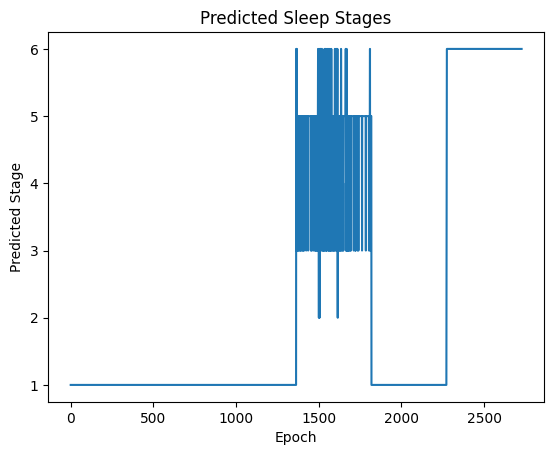

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)

plt.plot(predicted_labels)
plt.title('Predicted Sleep Stages')
plt.xlabel('Epoch')
plt.ylabel('Predicted Stage')
plt.show()

In [ ]:
input_shape = (6, 3000)  # Modify as needed

model = Sequential()

# Adjusted first convolutional layer with padding
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Adjusted second convolutional layer with padding
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and LSTM layers remain the same
model.add(Flatten())

# Reshape the data before passing it to the LSTM layer
model.add(Reshape((128, 1)))

model.add(LSTM(100, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Assuming 7 classes for sleep stages

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 6, 64)             576064    
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 3, 128)            24704     
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 1, 128)            0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 reshape (Reshape)           (None, 128, 1)           

In [ ]:
print(p00_n1_X.shape)
print(p00_n1_y.shape)

(2650, 6, 3000)
(2650,)


Epoch 1/30
83/83 [==============================] - 4s 25ms/step - loss: 1.3029 - accuracy: 0.7419
Epoch 2/30
83/83 [==============================] - 2s 19ms/step - loss: 0.8280 - accuracy: 0.7770
Epoch 3/30
83/83 [==============================] - 1s 13ms/step - loss: 0.7677 - accuracy: 0.7853
Epoch 4/30
83/83 [==============================] - 1s 14ms/step - loss: 0.7345 - accuracy: 0.7872
Epoch 5/30
83/83 [==============================] - 1s 14ms/step - loss: 0.7032 - accuracy: 0.7981
Epoch 6/30
83/83 [==============================] - 1s 14ms/step - loss: 0.7037 - accuracy: 0.7940
Epoch 7/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6875 - accuracy: 0.7909
Epoch 8/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6827 - accuracy: 0.8000
Epoch 9/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6778 - accuracy: 0.8011
Epoch 10/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6808 - accuracy: 0.7970
Epoch 11/

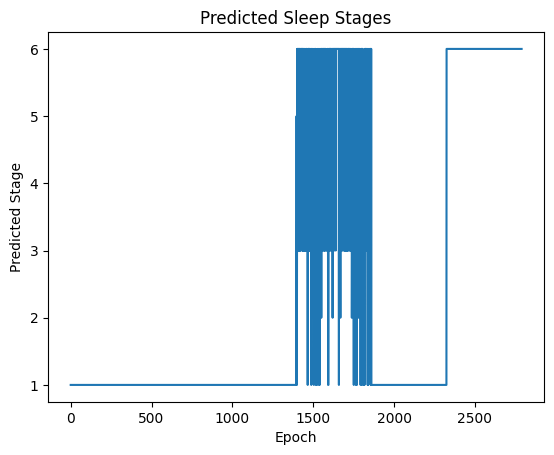

In [ ]:
# Load data (example for one file)
X = p00_n1_X.copy()
y = p00_n1_y.copy()

# Normalize X
X = X / np.max(X)

model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(GlobalAveragePooling1D())  # This layer will help in reducing the output to a one-dimensional array
model.add(Dense(100, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Output layer for 7 classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=30, batch_size=32)

predictions = model.predict(eval_a_X)

predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)

plt.plot(predicted_labels)
plt.title('Predicted Sleep Stages')
plt.xlabel('Epoch')
plt.ylabel('Predicted Stage')
plt.show()

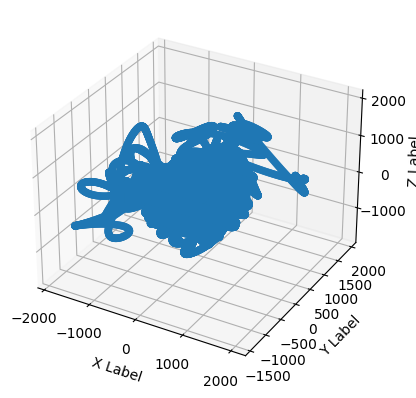

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p00_n1_X[:, 0], p00_n1_X[:, 1], p00_n1_X[:, 2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
p00_n1_X = train_arrays[0]
display(p00_n1_X)

array([1., 1., 1., ..., 1., 1., 1.])